# Data Collection from database

In [2]:
##connect to the MngoDb 
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb=myclient["Dataset_flight_delays"]
mycol=mydb["Dataset_flight_delays"]


In [ ]:
#data reading from mongoDB
import pandas as pd
data=pd.DataFrame(mycol.find())
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,2015,c-11,c-22,c-3,1316,AA,FAT,DFW,1313,N
1,2013,c-10,c-12,c-2,1242,US,SAN,PHL,2369,N
2,2015,c-5,c-5,c-5,1302,OO,SBP,SFO,191,Y
3,2014,c-8,c-8,c-1,1138,DL,PHL,ATL,665,N
4,2014,c-4,c-3,c-7,1438,DL,ATL,BDL,859,N


In [34]:
#Data read from local
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

data= pd.read_csv("/content/drive/MyDrive/Dataset_flight_delays.csv")
print(data.shape)
data.head()

(100000, 10)


,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,2015,c-11,c-22,c-3,1316,AA,FAT,DFW,1313,N
1,2013,c-10,c-12,c-2,1242,US,SAN,PHL,2369,N
2,2015,c-5,c-5,c-5,1302,OO,SBP,SFO,191,Y
3,2014,c-8,c-8,c-1,1138,DL,PHL,ATL,665,N
4,2014,c-4,c-3,c-7,1438,DL,ATL,BDL,859,N


# EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


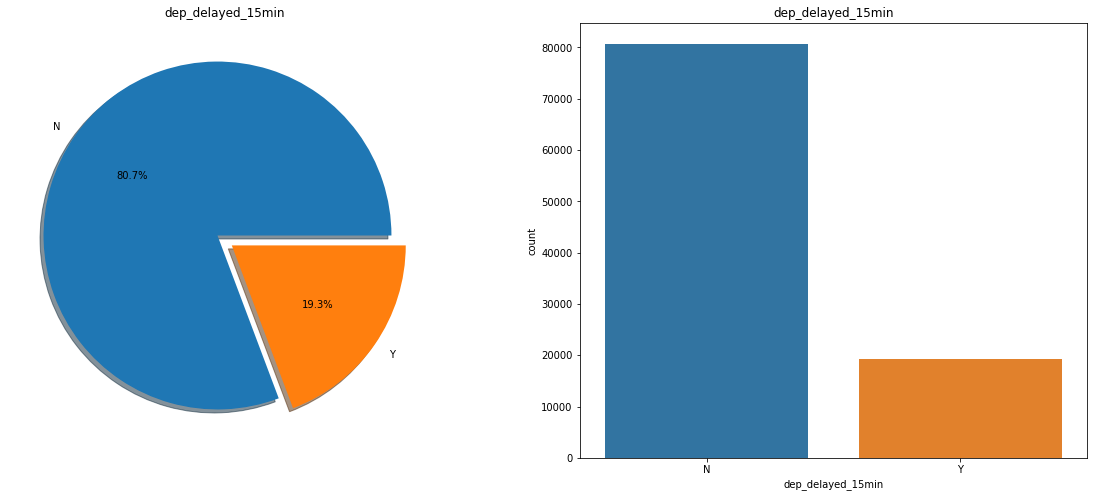

In [13]:
f,ax=plt.subplots(1,2,figsize=(20,8))
data['dep_delayed_15min'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('dep_delayed_15min')
ax[0].set_ylabel('')
sns.countplot('dep_delayed_15min',order = data['dep_delayed_15min'].value_counts().index, data=data,ax=ax[1])
ax[1].set_title('dep_delayed_15min')
plt.show()

Here we can see that data is imbalanced and 19.3% flights are delayed

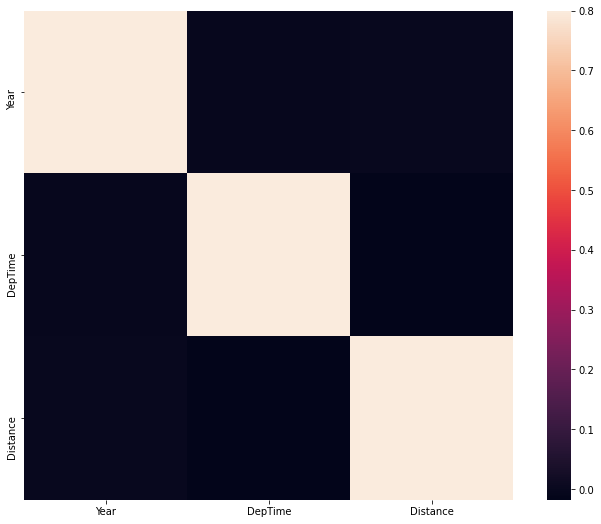

In [14]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

Here we can see that no multi colliniarity exists in variables

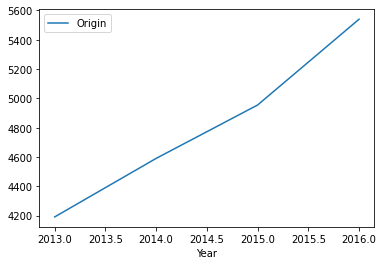

In [15]:
CancFlights = data[(data['dep_delayed_15min'] == "Y")]
CancFlights[['Year','Origin']].groupby(['Year']).count().plot()
plt.show()

Flights delaying increasing year by year

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa369d1acd0>,
      dtype=object)

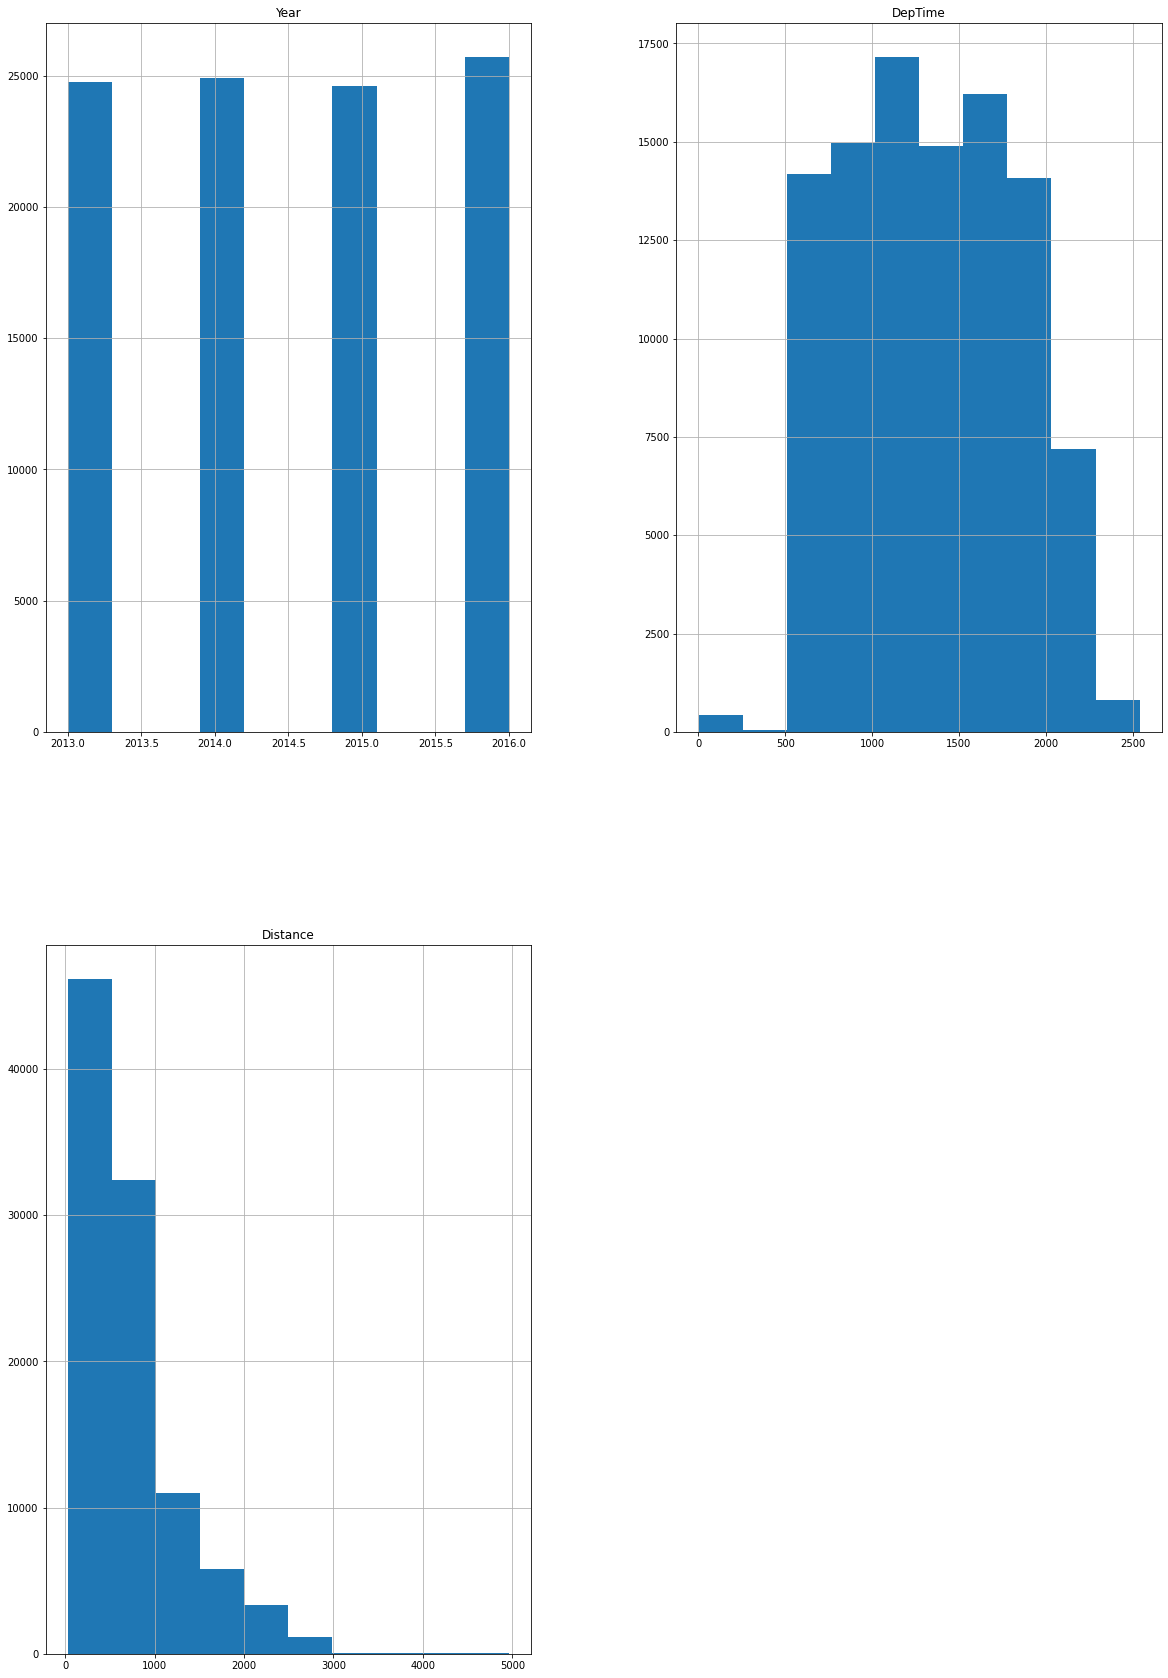

In [16]:
data.hist(figsize=(20,30))

We can see that Distance is Right Skewed

In [17]:
#Carrier Delays
print(data['UniqueCarrier'].value_counts())

WN    15006
AA     9164
DL     8161
OO     7274
MQ     7133
UA     6985
US     6380
NW     6332
XE     5744
CO     4281
OH     4246
EV     3958
FL     3070
AS     2247
YV     2013
B6     1910
DH     1449
HP     1366
9E      888
F9      862
HA      721
TZ      519
AQ      291
Name: UniqueCarrier, dtype: int64


In [18]:
print(data['Origin'].value_counts())

ATL    5861
ORD    4943
DFW    4319
LAX    3302
IAH    2946
       ... 
ROW       1
PMD       1
RHI       1
BLI       1
LNY       1
Name: Origin, Length: 307, dtype: int64


# Preprocessing


In [19]:
data.shape

(100000, 10)

In [20]:
#DEscriptive Statistics
data.describe()

,Year,DepTime,Distance
count,100000.000000,100000.000000,100000.000000
mean,2014.512710,1340.997820,723.077560
std,1.122306,476.295439,569.963269
min,2013.000000,1.000000,27.000000
25%,2014.000000,932.000000,316.000000
50%,2015.000000,1329.000000,563.000000
75%,2016.000000,1732.000000,950.000000
max,2016.000000,2540.000000,4962.000000


In [21]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'Origin', 'Dest', 'Distance', 'dep_delayed_15min'],
      dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Year               100000 non-null  int64 
 1   Month              100000 non-null  object
 2   DayofMonth         100000 non-null  object
 3   DayOfWeek          100000 non-null  object
 4   DepTime            100000 non-null  int64 
 5   UniqueCarrier      100000 non-null  object
 6   Origin             100000 non-null  object
 7   Dest               100000 non-null  object
 8   Distance           100000 non-null  int64 
 9   dep_delayed_15min  100000 non-null  object
dtypes: int64(3), object(7)
memory usage: 7.6+ MB


In [23]:
#Null value treatment
data.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
UniqueCarrier        0
Origin               0
Dest                 0
Distance             0
dep_delayed_15min    0
dtype: int64

In [24]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,2015,c-11,c-22,c-3,1316,AA,FAT,DFW,1313,N
1,2013,c-10,c-12,c-2,1242,US,SAN,PHL,2369,N
2,2015,c-5,c-5,c-5,1302,OO,SBP,SFO,191,Y
3,2014,c-8,c-8,c-1,1138,DL,PHL,ATL,665,N
4,2014,c-4,c-3,c-7,1438,DL,ATL,BDL,859,N


In [25]:
#Removing C from Month Dayofmonth and Dayofweek
data['Month'] = data['Month'].apply(lambda x : x[2:])
data['DayofMonth'] = data['DayofMonth'].apply(lambda x : x[2:])
data['DayOfWeek'] = data['DayOfWeek'].apply(lambda x : x[2:])
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,2015,11,22,3,1316,AA,FAT,DFW,1313,N
1,2013,10,12,2,1242,US,SAN,PHL,2369,N
2,2015,5,5,5,1302,OO,SBP,SFO,191,Y
3,2014,8,8,1,1138,DL,PHL,ATL,665,N
4,2014,4,3,7,1438,DL,ATL,BDL,859,N


In [26]:
#Lets convert target variable into numerical
data['dep_delayed_15min'] = data['dep_delayed_15min'].apply(lambda x : 0 if x == "N" else 1)
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,2015,11,22,3,1316,AA,FAT,DFW,1313,0
1,2013,10,12,2,1242,US,SAN,PHL,2369,0
2,2015,5,5,5,1302,OO,SBP,SFO,191,1
3,2014,8,8,1,1138,DL,PHL,ATL,665,0
4,2014,4,3,7,1438,DL,ATL,BDL,859,0


In [27]:
#Lets extract hour and minute features
data['Hour'] = data['DepTime'].apply(lambda x : str(x)[:-2])
data['Minute'] = data['DepTime'].apply(lambda x : str(x)[-2:])
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,Hour,Minute
0,2015,11,22,3,1316,AA,FAT,DFW,1313,0,13,16
1,2013,10,12,2,1242,US,SAN,PHL,2369,0,12,42
2,2015,5,5,5,1302,OO,SBP,SFO,191,1,13,02
3,2014,8,8,1,1138,DL,PHL,ATL,665,0,11,38
4,2014,4,3,7,1438,DL,ATL,BDL,859,0,14,38


In [28]:
#Drop useless columns
data1 = data.drop(['Year','DepTime' ,'UniqueCarrier','Origin','Dest'] , axis = 1)
data1.head()

,Month,DayofMonth,DayOfWeek,Distance,dep_delayed_15min,Hour,Minute
0,11,22,3,1313,0,13,16
1,10,12,2,2369,0,12,42
2,5,5,5,191,1,13,02
3,8,8,1,665,0,11,38
4,4,3,7,859,0,14,38


In [20]:
data1.dtypes

Month                object
DayofMonth           object
DayOfWeek            object
Distance              int64
dep_delayed_15min     int64
Hour                 object
Minute               object
dtype: object

Lets convert all the features to numercial type

In [21]:
data1.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
Distance             0
dep_delayed_15min    0
Hour                 0
Minute               0
dtype: int64

In [29]:
data1['Hour'] = data1['Hour'].apply(lambda x: 0 if x == '' else x)

In [30]:
data1['Month'] = data1['Month'].apply(lambda x: int(x))
data1['DayofMonth'] = data1['DayofMonth'].apply(lambda x: int(x))   
data1['DayOfWeek'] = data1['DayOfWeek'].apply(lambda x: int(x))
data1['Minute'] = data1['Minute'].apply(lambda x: int(x))
data1['Hour'] = data1['Hour'].apply(lambda x: int(x))
data1.dtypes

Month                int64
DayofMonth           int64
DayOfWeek            int64
Distance             int64
dep_delayed_15min    int64
Hour                 int64
Minute               int64
dtype: object

In [67]:
#Hypothesis testing
data1[["Distance","dep_delayed_15min"]].corr()

,Distance,dep_delayed_15min
Distance,1.00000,0.00787
dep_delayed_15min,0.00787,1.00000


Delay is less impact on Distance. So  other variables like timings(weather conditions on various time intervals) may delay the flights.

# Data Partition

In [32]:
X = data1.drop("dep_delayed_15min" , axis =1)
y = data1['dep_delayed_15min']

Under Sampling

In [35]:
from imblearn.under_sampling import NearMiss

# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=9)

# transform the dataset
X2, y2 = undersample.fit_resample(X, y)
len(X2),len(y2)

(38548, 38548)

In [37]:
#Data Standardization
from sklearn.preprocessing import StandardScaler

SS= StandardScaler()
X_norm = SS.fit_transform(X2)

In [38]:
#Spliting data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_norm,y2,test_size =0.2, random_state=1)

# Model Training

In [39]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix

clf = LogisticRegression()
# Train model
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('Logistic Regression ', accuracy_score(y_test, y_pred))

[[2865 1037]
 [1753 2055]]
Logistic Regression  0.6381322957198443


In [45]:
#KNN
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
KNN=KNeighborsClassifier(n_neighbors= 9)
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_pred,y_test)

[[2983  919]
 [1666 2142]]


0.6647211413748378

In [46]:
#Random Forest
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=300, random_state=1)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('Random Forest Classifier ', accuracy_score(y_test, y_pred))

[[3062  840]
 [1383 2425]]
Random Forest Classifier  0.7116731517509728


In [49]:
#XG Boost & Classifier¶
from xgboost import XGBClassifier

xgb= XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 500)
xgb.fit(X_train,y_train)
y_pred= xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_test,y_pred)

[06:53:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[[3188  714]
 [1328 2480]]


0.7351491569390403

In [50]:
## Hyperparameter optimization using RandomizedSearchCV for XgBoost Classifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

classifier = xgboost.XGBClassifier()


random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

random_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   36.3s finished



 Time taken: 0 hours 0 minutes and 38.01 seconds.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3,
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [51]:
random_search.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.3,
 'learning_rate': 0.2,
 'max_depth': 15,
 'min_child_weight': 5}

In [59]:

print(confusion_matrix(y_test,y_pred))
accuracy_score(y_pred,y_test)

[[3136  766]
 [1272 2536]]


0.7356679636835279

Confusion matrix:  
 [[3136  766]
 [1272 2536]]
accuracy_score   :    0.7356679636835279


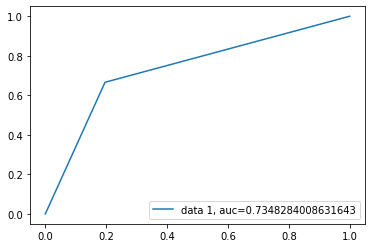

In [60]:
#Evalution metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve

y_pred = random_search.predict(X_test)

print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
print('accuracy_score   :   ', accuracy_score(y_test,y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [53]:
#Cross fold validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(random_search, X_train,y_train ,cv=10)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   27.7s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   29.7s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   28.5s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   25.0s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   21.2s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   19.1s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   37.8s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   20.2s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   37.7s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   27.5s finished


In [55]:
score

array([0.79280395, 0.78889226, 0.8096082 , 0.78266349, 0.79831365,
       0.79899539, 0.7994454 , 0.79547209, 0.79316657, 0.7873674 ])

In [56]:
score.mean()

0.7946728402679419

In each fold Xgboost is giving better accuracy.

In [57]:
#Random forest hyper paraameter tuning
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

param_grid = {

    'n_estimators': [100 ,200, 350, 400 ,500 ,600 ,700, 800 , 900 ,1000]

}

# Create a based model

rf = RandomForestClassifier()

# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 

                          cv = 3, n_jobs = -1, verbose = 2)


# Fit the grid search to the data

grid_search.fit(X_train,y_train)

grid_search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.3min finished


{'n_estimators': 350}

Confusion matrix:  
 [[3080  822]
 [1397 2411]]
accuracy_score   :    0.7121919584954605


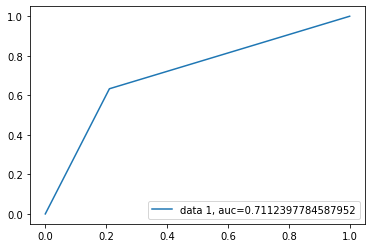

In [61]:
y_pred=grid_search.predict(X_test)
print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
print('accuracy_score   :   ', accuracy_score(y_test,y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In all the models xgboost results best accuracy. 